Ashton O'Connor (amo85)
Quimey Moure (qem2)
20 October 2021

# INFO 2950 Project Phase II: Formula 1

In [2]:
import sys
!conda install --yes --prefix {sys.prefix} requests
!conda install --yes --prefix {sys.prefix} bs4

import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



# Research Question(s)

How can we model the value of a racer in accordance to their overall performance?

From the results of question one, how does the value of F1 racers compare to their compensation, and which racers are economically undervalued or overvalued?


# Data Collection and Cleaning

## Data Collection Description
Our data collection consisted of two components. First, we scraped the official formula1.com website for official race results. Using BeautifulSoup, we coded a for loop to parse through individual driver result datasets and race winner datasets from 1950 to 2021, appending each dataframe by year to an overall dataframe, resulting in two dataframes over 1,000 rows each for driver data and race data. We also utilized this for loop to add a ‘Year’ column to attach the year the race occurred for every row to help with connecting the results to the salary data later. This BeautifulSoup for loop was sufficient to convert the results data into DataFrames. Secondly, with the results data established, we had to pull in corresponding salary data to determine how salaries correlated with individual and race performance. Unfortunately, this data is not officially published, and no one website contained data for all years. Thus, we had to parse through the internet, collecting data on salaries from 2021 to 2010 from various sites and compiling the information into a CSV, which was then loaded into Python. 

## Additional Data Curation/Cleaning
With our three datasets established, we then had to clean each to ensure that the data would be ready for analysis and that the data frames could be merged. Firstly, the two datasets created using BeautifulSoup pulled in multiple ‘Unnamed’ columns with Nan values, so we dropped these columns and set the dataframes equal to the columns we wanted to conduct analysis on. Importantly, the BeautifulSoup code also had difficulty parsing driver names. Each drive name was pulled in with an acronym at the end, so we dropped this by splitting the last word in the driver name column to remove the acronym and just keep the driver's first and last name. Additionally, BeautifulSoup had issues with special symbols. For Kimi Räikkönen, he was pulled in as RÃ¤ikkÃ¶nen. So, we parsed through both result dataframes and replaced names that were incorrectly translated to their english version, so for Kimi, we replaced RÃ¤ikkÃ¶nen with “Raikkonen”. Additionally, in order to merge results with the salary table, we had to ensure that driver names were exact matches, so we also parsed through all names in each table and replaced all double spaces with single spaces and trimmed any additional white space that may have been brought in. In all datasets, all numerical values were pulled in as numeric, so no transformation or cleaning was needed.

With this cleaning completed, we then successfully merged our result tables with our salary tables using an inner join on driver name and year to ensure that we accurately represented the salary a driver was earning the year their result was recorded. Additionally, we added a column to our analysis to represent the driver’s “cost per point” by dividing the salary column by the points column. This created issues for drivers with 0 points creating inf values, so we had to ensure that we dropped all inf values from this table. 


## Data Cleaning & Curation Code:

In [58]:
salary_url = 'https://drive.google.com/file/d/1AG_ReOXKGeYSe2WhPk1Q2_G96wGR1GdT/view?usp=sharing'
driver_url = 'https://drive.google.com/file/d/1SxJfQf2UFY2YmQ7VMpbJT9DMCBVgDd2i/view?usp=sharing'
race_url = 'https://drive.google.com/file/d/14Pd84yn97UWAaVrdAkz3WsihVeUwDj2G/view?usp=sharing'

salary_url2='https://drive.google.com/uc?id=' + salary_url.split('/')[-2]
driver_url2='https://drive.google.com/uc?id=' + driver_url.split('/')[-2]
race_url2='https://drive.google.com/uc?id=' + race_url.split('/')[-2]

salary_df = pd.read_csv(salary_url2,encoding='windows-1252')
driver_df = pd.read_csv(driver_url2)
race_df = pd.read_csv(race_url2)

In [59]:
#data cleaning
driver_df = driver_df[['Pos','Driver','Nationality','Car','PTS','Year']]
race_df = race_df[['Grand Prix','Date','Winner','Car','Laps','Time','Year']]

driver_df['Driver'] = driver_df['Driver'].str.rsplit(' ',1).str[0]
driver_df['Driver'] = driver_df['Driver'].str.replace('  ', ' ')
driver_df['Driver'] = driver_df['Driver'].str.replace('   ', ' ')
driver_df['Driver'] = driver_df['Driver'].str.replace('RÃ¤ikkÃ¶nen','Raikkonen')
race_df['Winner'] = race_df['Winner'].str.rsplit(' ',1).str[0]

In [60]:
#merging tables
results_by_salary= salary_df.merge(driver_df,on=['Driver','Year'])

In [61]:
#adding column for cost per point (CPP) by player
results_by_salary['CPP'] = results_by_salary['Salary']/results_by_salary['PTS']
CPP_df = results_by_salary[results_by_salary['CPP']!=np.inf]
CPP_df = CPP_df.dropna()
CPP_df.head()

,Driver,Salary,Year,Pos,Nationality,Car,PTS,CPP
0,Kimi Raikkonen,7525000,2021,17,FIN,Alfa Romeo Racing Ferrari,6.0,1.254167e+06
1,Antonio Giovinazzi,684000,2021,18,ITA,Alfa Romeo Racing Ferrari,1.0,6.840000e+05
2,Fernando Alonso,20500000,2021,10,ESP,Alpine Renault,58.0,3.534483e+05
3,Esteban Ocon,4652000,2021,11,FRA,Alpine Renault,46.0,1.011304e+05
4,Sebastian Vettel,17000000,2021,12,GER,Aston Martin Mercedes,35.0,4.857143e+05


# Data Description

## Motivation
This dataset was created as part of a final project for the Introductory Data Science course, INFO 2950, at Cornell University to analyze the value of individual F1 racers through data analysis. The dataset was created by Ashton O’Connor and Quimey Moure, students in the course, on behalf of Cornell University. The dataset was created for free and as part of a course assignment. 

## Composition
In our dataset, observations (rows) are individual occurrences of a racer’s result per year. Each row can be identified by a combination of the driver’s name and racing year as a composite key. The attributes (columns) describe the performance and corresponding salary of the driver, specifically measuring season position, points, year, and salary earned for that year. For our individual driver data, our dataset contains 1,596 instances, while our dataset for race data contains 1,054 instances and for salaries contains 250 observations. Due to the absence of salary data, our final dataset contains 208 rows as a result of the inner join.

Both our race results contain all possible instances of recorded F1 racing data as they are scrapped from the official F1 website. However, due to the confidentiality of driver salaries, our salary data and resulting merged table only contain a sample of driver results with corresponding salaries. 


## Collection Process
The nature of F1 racing and the data collected on results enabled us to collect the entire population of F1 data from the official website through simple web scraping. However, since our project is focused on the connection between performance and pay, the availability of salary data for individual drivers, especially for those that are not highly popular or for those going back beyond 2010 limited the data that we could observe and record. Most websites containing information on salaries only had salary information for the top ten drivers at the time, and were often rough estimates. Thus, our salary data is based upon aggregated information from multiple websites, so we must assume that the salaries are not completely accurate, and only a rough estimate, as they did not come from official sources. 

## Preprocessing
The official data for race results was collected by F1 and uploaded to the formula1 website in an easily digestible format, which allowed us to simply copy the datasets from the website and append all data to one large dataframe without much preprocessing. In order to compile salary data however, the majority of information was based upon inside sources that had published data on popular players online. We scraped the web and compiled a CSV from various websites by year for driver salary data. However, this resulted in gaps in salary data for racers that websites did not publish information on, and for racers before 2010. Thus, when inputting this information into a CSV, we had to ensure that salaries were in the correct currency and that the driver names were not mispelled. Overall, the readily available F1 results data made the preprocessing process simple, but the confidentiality of driver salaries complicated that component of our data collection and limited the amount of data we could collect. 

## Uses
Our raw data can be found on this Google Drive: https://drive.google.com/drive/folders/1uuwPLplQjl_w9VTavZKMgT9Ne12BHwTU?usp=sharing. 
Our analysis and code can be found on our github: https://github.com/quimey1/MoneyCar.


Please reach out to Quimey Moure (qem2) or Ashton O’Connor (amo85) with any issues accessing the link. 
This dataset has so far been used to conduct initial exploratory data analysis, detailed below, which was used to inform our research question and future goals for our analysis. 


# Data Limitations

The greatest limitation is the availability of driver salary data. No formal salary data exists for F1 drivers, and there is a prominent absence of information for less popular drivers or for those going back beyond 2010. Due to this, our resulting dataset is only around 200 rows, compared to 1,500, so we are sacrificing a lot of data in order to analyze salaries. This is a big limitation and we are looking into ways around it, including continuing to scrape for salary data, analyze team budgets, and set assumptions for salaries of players without official data. Unfortunately, in our analyze, salary is a crucial component to determine utlimately whether a player is over or undervalued. 

Another limitation is that our result data only has information about a races' winner and a drivers points, which means that as of now, these are the metrics we need to use to evaluate "value." However, pit stop times and value of car, as well as other factors, also affect the performance and inherent value of a driver, so we are also looking for ways to incorporate or account for this limitation. 

Finally, our data only goes back until 2010, where data on salaries becomes less ready available. Less, due to the limited amount of data, the strength of our analysis and applicability to drivers before 2010 will be weakened. 

# Exploratory Data Analysis

In [66]:
#summary statistics:

#average salary
avg_salary = results_by_salary['Salary'].mean()
#average points
avg_pts = results_by_salary['PTS'].mean()

#average cost per point (CPP)
avg_cpp = CPP_df['CPP'].mean()

print("Average Salary: ","$",round(avg_salary,2))
print("Average PTS: ",round(avg_pts,2))
print("Average Cost per Point: ","$",round(avg_cpp,2))
print("Highest Salary: ","$",max(results_by_salary['Salary']))

Average Salary:  $ 9287661.96
Average PTS:  96.9
Average Cost per Point:  $ 223139.42
Highest Salary:  $ 76000000


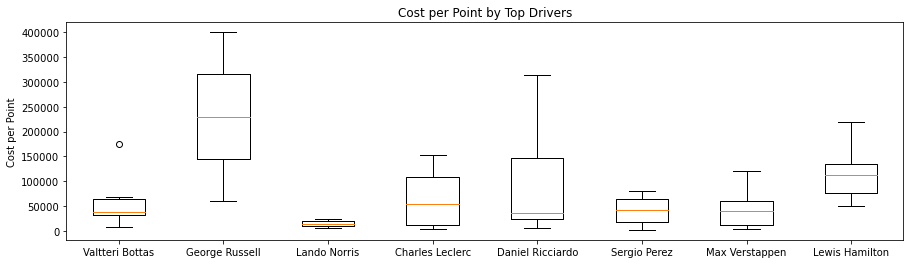

In [67]:
#top ten racers' CPPS
vb = CPP_df[CPP_df['Driver']=='Valtteri Bottas']
gr = CPP_df[CPP_df['Driver']=='George Russell']
ln = CPP_df[CPP_df['Driver']=='Lando Norris']
cl = CPP_df[CPP_df['Driver']=='Charles Leclerc']
dr = CPP_df[CPP_df['Driver']=='Daniel Ricciardo']
sp = CPP_df[CPP_df['Driver']=='Sergio Perez']
mv = CPP_df[CPP_df['Driver']=='Max Verstappen']
lh = CPP_df[CPP_df['Driver']=='Lewis Hamilton']
plt.rcParams["figure.figsize"] = [15, 4]
plt.boxplot([vb['CPP'], gr['CPP'],ln['CPP'],cl['CPP'],dr['CPP'],sp['CPP'],mv['CPP'],lh['CPP']])
driver_labels = ('Valtteri Bottas','George Russell','Lando Norris','Charles Leclerc','Daniel Ricciardo',
          'Sergio Perez','Max Verstappen','Lewis Hamilton')
plt.xticks(np.arange(len(driver_labels))+1,driver_labels)
plt.ylabel('Cost per Point')
plt.title("Cost per Point by Top Drivers")
plt.show()

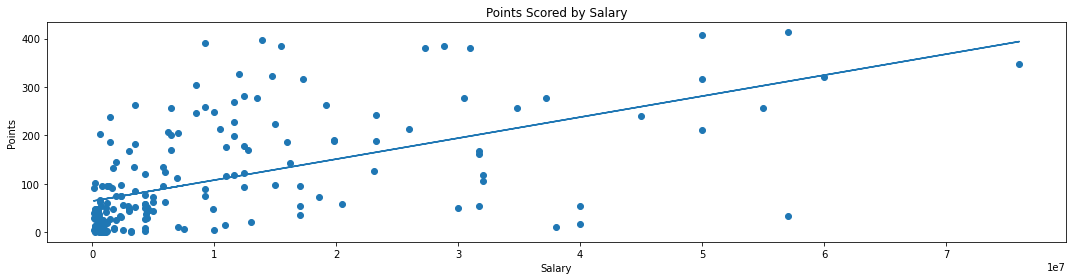

Coefficeint: [4.33698439e-06]
Intercept: 64.45
Correlation (r): 0.32


In [68]:
#regression model of how salary impacts the points a driver earns

x=CPP_df[['Salary']]
y=CPP_df['PTS']
plt.scatter(x,y)

#fit regression
regressor = LinearRegression()
regressor.fit(x,y)
ypred = regressor.predict(CPP_df[['Salary']])

#plot regression
plt.rcParams["figure.figsize"] = [5, 5]
plt.plot(x,regressor.coef_*x + regressor.intercept_)
plt.xlabel('Salary')
plt.ylabel('Points')
plt.title('Points Scored by Salary')
plt.tight_layout()

plt.show()
print("Coefficeint:",regressor.coef_)
print("Intercept:",round(regressor.intercept_,2))
print("Correlation (r):", round(regressor.score(x,y),2))

Through this exploratory data analysis, we began by analyzing basic summary statistics to see what the average salary is for F1 racers, and what the average points earned are. From this, we could analyze the average cost per point of around $223,000. This analysis was helpful for describing our data, but we wanted to conduct more analysis to inform our project. First, we constructed a boxplot of the cost per points for the 10 "best" drivers. From this, we can already see wide variations in those that are the most cost-effective in terms of earning points for their salary, and can see that while some revered racers like Lewis Hamilton may have net higher points, they do so at a higher cost to their team. To then understand this a little better, we constructed a scatter plot and linear regression model to model the relationship between salary and points. 

As a result, this analysis has informed us of the usefulness of cost per point as a metric for analyzing performance. However, we still want to analyze this on a more granular level and need to find ways to scale a players performance depending on the car and pit stop times as well. 


# Questions for Reviewers

1. How can we get around the limitations in salary data? Our initiation dataset was around 1,500 rows, yet merging with available salary data dropped our table to 200 rows. 
2. How do we account for the different teams or cars racers use to "scale" their performane? Racers with superior cars will place better than those with worse cars despite similar driver skill levels. 
3. Is assuming that a racers "worth" more than their salary represents undervaluation (or vice versa for overvaluation) a reasonable way to approach our research question? 
4. How can we create assumptions for the salaries of racers that have no data?
5. How do we avoid weighting the different components on a racers' value arbitrarily? For example, we could say that if a racer wins a race, that is twice as valuable as their qualifying pole result, but how do we determine or analyze that variable difference?
6. For Cost per Point, how do we accomodate drivers with 0 points that create an inf value without dropping their data?